U (Unitary matrix):
 [[-0.69337525  0.68819096 -0.16245985 -0.13867505]
 [-0.69337525 -0.68819096  0.16245985 -0.13867505]
 [-0.13867505 -0.16245985 -0.68819096  0.69337525]
 [-0.13867505  0.16245985  0.68819096  0.69337525]]

Sigma (Diagonal matrix):
 [[7.21110255e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.23606798e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.23606798e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.89625529e-17]]

Vh (Unitary matrix - conjugate transpose of V):
 [[-0.5        -0.5        -0.5        -0.5       ]
 [-0.68819096 -0.16245985  0.16245985  0.68819096]
 [-0.16245985  0.68819096 -0.68819096  0.16245985]
 [-0.5         0.5         0.5        -0.5       ]]
MZI Arrangement for U:


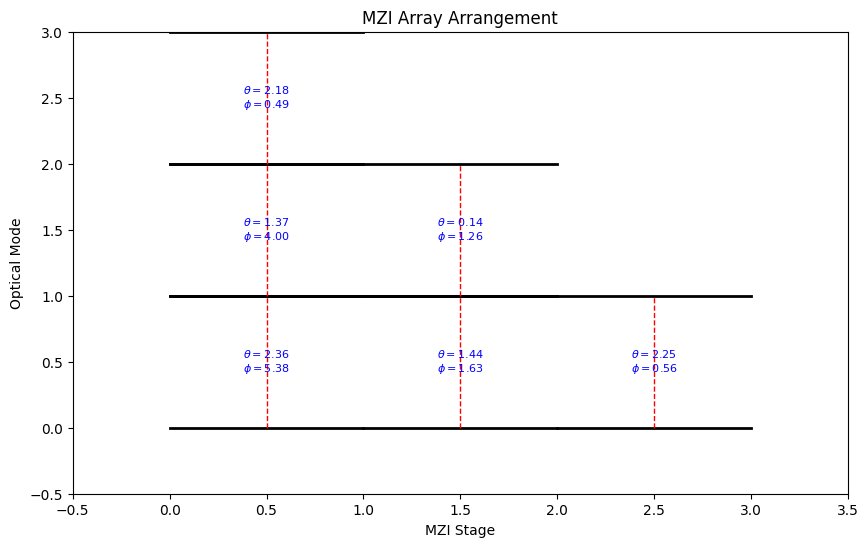

MZI Arrangement for Vh:


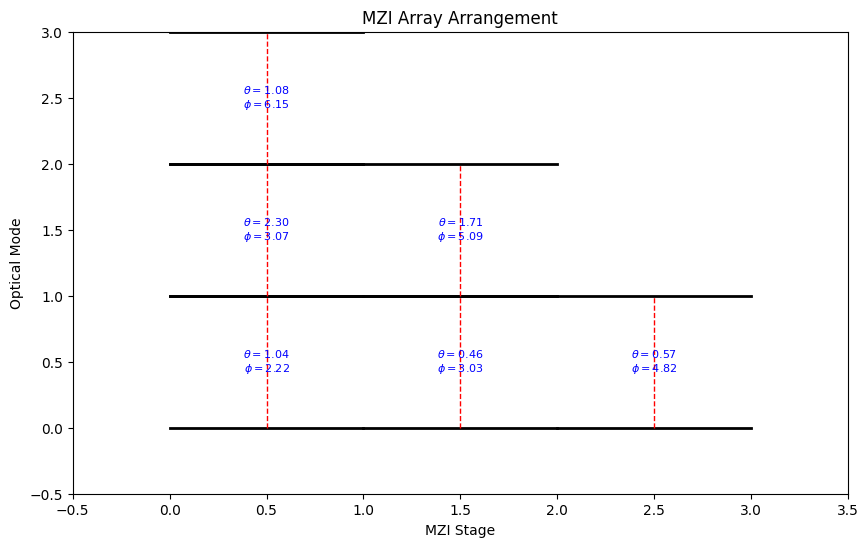

Sigma (Attenuation/Scaling Factors): [7.21110255e+00 3.23606798e+00 1.23606798e+00 6.89625529e-17]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a sample 4x4 weight matrix (can be any real matrix)
W = np.array([[1, 2, 3, 4],
              [4, 3, 2, 1],
              [1, 0, 1, 0],
              [0, 1, 0, 1]])

# Perform Singular Value Decomposition (SVD)
U, Sigma, Vh = np.linalg.svd(W)

# Display the resulting SVD components
print("U (Unitary matrix):\n", U)
print("\nSigma (Diagonal matrix):\n", np.diag(Sigma))
print("\nVh (Unitary matrix - conjugate transpose of V):\n", Vh)

# Function to plot MZI arrangement
def plot_mzi_array(mzi_config):
    n = len(mzi_config)
    plt.figure(figsize=(10, 6))
    
    # Create a grid for placing the MZI stages
    for stage, mzi in enumerate(mzi_config):
        for i, theta_phi in enumerate(mzi):
            # Draw Mach-Zehnder Interferometer connections
            plt.plot([stage, stage + 1], [i, i], color='black', lw=2)
            plt.plot([stage, stage + 1], [i + 1, i + 1], color='black', lw=2)
            plt.plot([stage + 0.5, stage + 0.5], [i, i + 1], color='red', lw=1, linestyle='--')

            # Annotate phase shifters
            plt.text(stage + 0.5, i + 0.5, f"$\\theta={theta_phi[0]:.2f}$\n$\\phi={theta_phi[1]:.2f}$", 
                     ha='center', va='center', fontsize=8, color='blue')

    plt.xlim(-0.5, len(mzi_config) + 0.5)
    plt.ylim(-0.5, n)
    plt.xlabel("MZI Stage")
    plt.ylabel("Optical Mode")
    plt.title("MZI Array Arrangement")
    plt.grid(False)
    plt.show()

# Reck decomposition for a unitary matrix into MZIs
# This function is a simple simulation; actual phase values would be computed through an algorithm
def reck_decomposition(U):
    # Initialize with some random phase values for demonstration purposes
    n = U.shape[0]
    mzi_config = []
    for i in range(n-1):
        stage = []
        for j in range(n-i-1):
            theta = np.random.uniform(0, np.pi)  # Random phase shift for now
            phi = np.random.uniform(0, 2*np.pi)  # Random phase shift for now
            stage.append((theta, phi))
        mzi_config.append(stage)
    return mzi_config

# Apply Reck decomposition to both U and V matrices (both are unitary)
mzi_U = reck_decomposition(U)
mzi_Vh = reck_decomposition(Vh)

# Plot the MZI arrangement for U
print("MZI Arrangement for U:")
plot_mzi_array(mzi_U)

# Plot the MZI arrangement for Vh
print("MZI Arrangement for Vh:")
plot_mzi_array(mzi_Vh)

# The diagonal Sigma can be implemented using optical attenuators
print("Sigma (Attenuation/Scaling Factors):", Sigma)
